In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#### 1) What are the formulas for SD? Describe in your own words what standard deviation describes in a distribution.

If the 'biased sample variance' (the second central moment of the sample, which is a downward-biased estimate of the population variance) is used to compute an estimate of the population's standard deviation, the result is

$$
s_N =\sqrt{ \frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}.
$$

Here taking the square root introduces further downward bias due to the square root being a concave function. The bias in the variance is easily corrected, but the bias from the square root is more difficult to correct, and depends on the distribution in question.

An unbiased estimator for the variance is given by applying Bessel's correction, using N−1 instead of N to yield the 'unbiased sample variance,' denoted $s^2$:
$s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2.$
This estimator is unbiased if the variance exists and the sample values are drawn independently with replacement. N−1 corresponds to the number of degrees of freedom in the vector of deviations from the mean, $\scriptstyle(x_1-\overline{x},\; \dots,\; x_n-\overline{x}).$

Taking square roots reintroduces bias (because the square root is a nonlinear function, which does not commute with the expectation), yielding the corrected sample standard deviation, denoted by s:
$$s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}.$$
As explained above, while $s^2$ is an unbiased estimator for the population variance, s is still a biased estimator for the population standard deviation, though markedly less biased than the uncorrected sample standard deviation. The bias is still significant for small samples (N less than 10), and also drops off as 1/N as sample size increases. This estimator is commonly used and generally known simply as the sample standard deviation.

#### 2) What expectations do we have given the central limit theorem (i.e., what are the claims of the central limit theorem)? In your own words explain what these expectations mean and why they make sense conceptually.

Words words words.

#### 3) a. Create a histogram of weight. Create a unique figure title and label the x-axis.

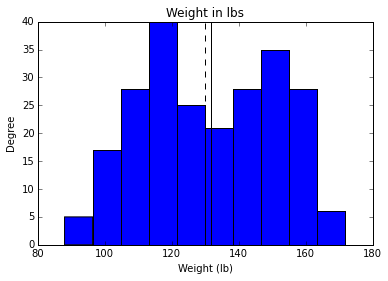

In [2]:
df = pd.read_csv('HW01Data.csv')
df.plot(kind='hist', y='weight_lbs', legend=False)
plt.title('Weight in lbs')
plt.xlabel('Weight (lb)')
plt.axvline(df.weight_lbs.mean(), color='black')
plt.axvline(df.weight_lbs.median(), color='black', linestyle='--')

#### b. Create a density plot of height. Create a unique figure title and label the x-axis. Add a solid black vertical line to the plot at the mean value of height. Add a dotted black vertical line to the plot at the median value of height. *Make sure you look at the lines() function syntax to learn about the argument for line types.

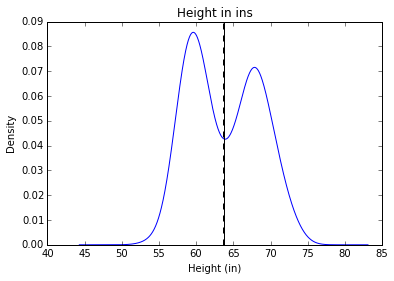

In [3]:
df.plot(kind='kde', y='height_in', legend=False)
plt.title('Height in ins')
plt.xlabel('Height (in)')
plt.axvline(df.height_in.mean(), color='black')
plt.axvline(df.height_in.median(), color='black', linestyle='--')

#### 4) Calculate the mean, median, variance, minimum, and maximum values of BMI for each unique condition of biological sex and education completed—you’ll need to calculate BMI again using the formula provided in HW01 (if you saved your syntax you can copy and paste that). Summarize these values in a table. Comment on how these groups compare on these statistics.

In [4]:
df['bmi'] = df.apply(lambda x: (x['weight_lbs']/x['height_in']**2) * 703, axis=1)
print(df.groupby(('biosex', 'ed_cmplt')).bmi.agg(['mean', 'median', 'var', 'min', 'max']))

                        mean     median       var        min        max
biosex ed_cmplt                                                        
FEMALE College2YR  23.013821  22.371433  3.908364  20.281319  25.973420
       College4YR  22.838584  22.979353  5.056110  18.099274  27.748731
       HS          22.728031  22.732402  8.640603  18.147567  26.777365
       MA          22.091436  22.292065  6.016555  16.932930  26.235072
       PhD         23.480749  24.045792  6.674042  17.626489  27.536907
MALE   College2YR  22.419280  22.168032  5.757190  18.430776  30.227456
       College4YR  22.038994  21.949803  2.498297  19.095423  24.799519
       HS          23.106290  22.723011  6.514539  16.839152  28.096583
       MA          23.206360  24.089050  5.899063  17.711650  26.195594
       PhD         22.745859  22.467367  3.279681  18.260705  27.878717


The values of these statistsics are different.

#### 5) a. Identify the rows with the maximum and minimum BMI values. What are the row numbers and the maximum and minimum BMI values?

In [5]:
# Note that R is 1 based and Python is 0 based
print('Min: {}, Max: {}'.format(df.bmi.idxmax(), df.bmi.idxmin()))

Min: 62, Max: 71


#### b. Standardize BMI values so that they have a mean of zero and standard deviation of one. Now identify the rows with the maximum and minimum standardized BMI values. What are the row numbers and what are the maximum and minimum standardized BMI values?

In [6]:
df['standard_bmi'] = (df.bmi - df.bmi.mean()) / df.bmi.std()

print('Mean: {}, STD: {}'.format(df.standard_bmi.mean(), df.standard_bmi.std()))

# Note that R is 1 based and Python is 0 based
print('Min: {}, Max: {}'.format(df.standard_bmi.idxmax(), df.standard_bmi.idxmin()))

Mean: -6.118138899651078e-16, STD: 0.9999999999999954
Min: 62, Max: 71


#### c. Standardize BMI values so that the mean is 100 and the standard deviation is 15. Identify the rows with the maximum and minimum standardized BMI values. What are the row numbers and what are the maximum and minimum standardized BMI values.

In [7]:
df['strange_bmi'] = 100 + (df.bmi - df.bmi.mean()) / (1/15 * df.bmi.std())

print('Mean: {}, STD: {}'.format(df.strange_bmi.mean(), df.strange_bmi.std()))

# Note that R is 1 based and Python is 0 based
print('Min: {}, Max: {}'.format(df.strange_bmi.idxmax(), df.strange_bmi.idxmin()))

Mean: 100.0, STD: 14.999999999999867
Min: 62, Max: 71


#### d. What conclusions can you draw about linear transformations of data based on your answers to the preceding questions (i.e., 5a-5c)?

Linear transformations of data will generally not change the location of the maximum and minimum value locations, but can allow for the manipulation of calculated aggregations, such as the mean and the standard deviation.